In [371]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('D:\Data Analysis\Migrain\migrainKNN-NB-SVM-main\data.csv')
pd.set_option('display.max_columns',None)
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [372]:
df.shape

(400, 24)

In [373]:
df.size

9600

In [374]:
df.describe()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,400.000000
mean,31.705000,1.610000,2.365000,0.972500,0.977500,2.47000,0.987500,0.322500,0.977500,0.980000,1.48750,0.302500,0.037500,0.0025,0.125000,0.060000,0.015000,0.005000,0.015000,0.0,0.017500,0.007500,0.410000
std,12.139043,0.770964,1.675947,0.268186,0.277825,0.76849,0.111242,0.468019,0.148489,0.140175,0.99111,0.609855,0.190221,0.0500,0.331133,0.237784,0.121705,0.070622,0.121705,0.0,0.131289,0.086385,0.492449
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,22.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,28.000000,1.000000,2.000000,1.000000,1.000000,3.00000,1.000000,0.000000,1.000000,1.000000,2.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,40.000000,2.000000,4.000000,1.000000,1.000000,3.00000,1.000000,1.000000,1.000000,1.000000,2.00000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000
max,77.000000,3.000000,8.000000,2.000000,2.000000,3.00000,1.000000,1.000000,1.000000,1.000000,4.00000,2.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [376]:
df.isna().sum()

Age            0
Duration       0
Frequency      0
Location       0
Character      0
Intensity      0
Nausea         0
Vomit          0
Phonophobia    0
Photophobia    0
Visual         0
Sensory        0
Dysphasia      0
Dysarthria     0
Vertigo        0
Tinnitus       0
Hypoacusis     0
Diplopia       0
Defect         0
Ataxia         0
Conscience     0
Paresthesia    0
DPF            0
Type           0
dtype: int64

In [377]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Ataxia', 'Conscience', 'Paresthesia', 'DPF',
       'Type'],
      dtype='object')

In [378]:
df.Type.unique()

array(['Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Sporadic hemiplegic migraine',
       'Familial hemiplegic migraine', 'Other',
       'Typical aura without migraine'], dtype=object)

In [379]:
df.corr()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF
Age,1.000000,-0.045263,0.073431,0.133766,0.128077,0.114036,0.006542,-0.028650,-0.101022,-0.031461,0.047605,-0.009244,-0.161261,-0.048333,-0.026967,-0.098046,-0.008872,0.033883,0.028449,NaN,-0.039212,-0.000275,0.088623
Duration,-0.045263,1.000000,0.149240,-0.003515,0.005733,0.052115,-0.144654,-0.046468,-0.011165,-0.072356,-0.058876,-0.073614,-0.019653,-0.039660,0.122716,-0.022421,0.009082,0.035904,0.062503,NaN,-0.056207,0.081661,0.072351
Frequency,0.073431,0.149240,1.000000,-0.033373,-0.030762,0.070793,0.037977,0.133929,0.043154,0.031151,-0.225082,-0.046995,-0.105934,-0.010917,-0.064355,-0.061381,-0.063772,-0.057808,-0.076059,NaN,-0.097445,-0.053578,0.052049
Location,0.133766,-0.003515,-0.033373,1.000000,0.933517,0.658737,-0.011551,0.030900,-0.267320,-0.214672,-0.326600,-0.102248,0.020265,0.005140,-0.045861,-0.013362,0.012670,0.007278,0.012670,NaN,0.013702,0.008925,-0.028276
Character,0.128077,0.005733,-0.030762,0.933517,1.000000,0.648325,-0.009123,0.017396,-0.437568,-0.397716,-0.342347,-0.137233,0.016006,0.004059,-0.023838,-0.017451,0.010007,0.005748,0.010007,NaN,0.010822,0.007049,-0.023997
Intensity,0.114036,0.052115,0.070793,0.658737,0.648325,1.000000,0.010261,-0.011358,-0.104765,-0.098647,-0.466105,-0.213210,-0.035147,-0.030656,-0.024622,-0.099848,0.031620,0.048950,0.085214,NaN,0.092158,0.060027,-0.073378
Nausea,0.006542,-0.144654,0.037977,-0.011551,-0.009123,0.010261,1.000000,0.077624,0.134659,0.466108,-0.012787,-0.091896,0.022208,0.005632,-0.161592,-0.066325,0.013884,0.007976,0.013884,NaN,0.015015,0.009780,-0.134965
Vomit,-0.028650,-0.046468,0.133929,0.030900,0.017396,-0.011358,0.077624,1.000000,-0.003516,0.022157,-0.150679,0.008583,-0.051729,0.072561,-0.082881,-0.039186,-0.041140,0.026919,0.002860,NaN,0.030285,0.002015,0.022945
Phonophobia,-0.101022,-0.011165,0.043154,-0.267320,-0.437568,-0.104765,0.134659,-0.003516,1.000000,0.700786,0.074719,-0.007680,0.029947,0.007595,-0.197516,0.038331,0.018722,0.010755,0.018722,NaN,0.020248,0.013189,-0.044900
Photophobia,-0.031461,-0.072356,0.031151,-0.214672,-0.397716,-0.098647,0.466108,0.022157,0.700786,1.000000,0.070356,-0.017004,0.028198,0.007152,-0.161985,0.036092,0.017629,0.010127,0.017629,NaN,0.019066,0.012418,-0.062449


In [380]:
df.drop('Ataxia',axis=1,inplace=True)

<AxesSubplot:>

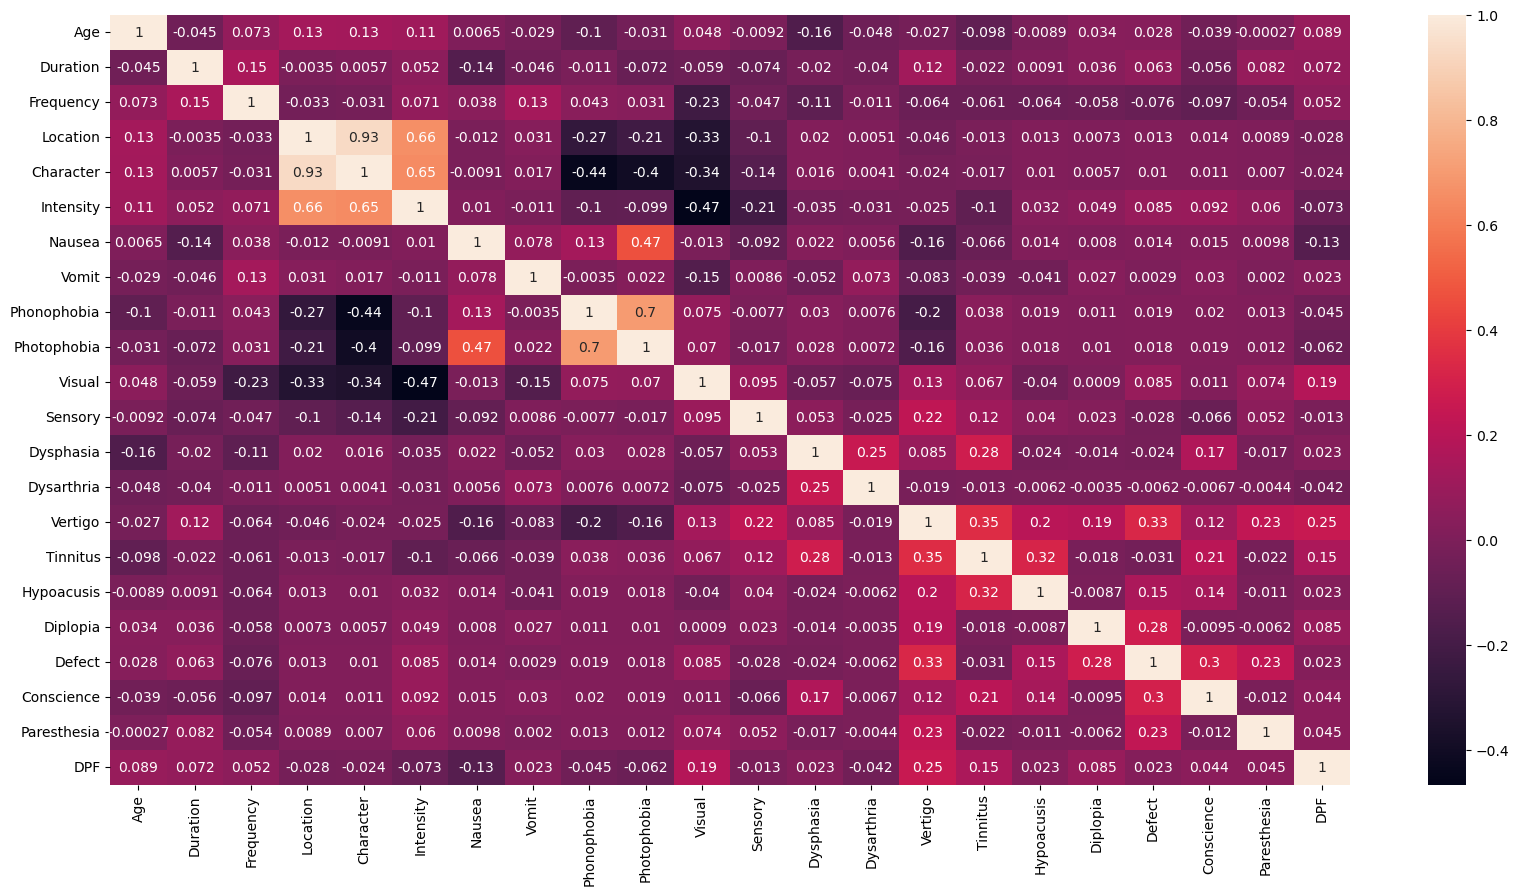

In [381]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),ax=ax,annot=True)

In [382]:
df.columns

Index(['Age', 'Duration', 'Frequency', 'Location', 'Character', 'Intensity',
       'Nausea', 'Vomit', 'Phonophobia', 'Photophobia', 'Visual', 'Sensory',
       'Dysphasia', 'Dysarthria', 'Vertigo', 'Tinnitus', 'Hypoacusis',
       'Diplopia', 'Defect', 'Conscience', 'Paresthesia', 'DPF', 'Type'],
      dtype='object')

In [383]:
df.duplicated().sum()

6

In [384]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,Visual,Sensory,Dysphasia,Dysarthria,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,1,2,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,2,2,0,0,1,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,4,0,0,0,0,0,0,0,0,0,0,1,Typical aura with migraine


Text(0.5, 1.0, 'Top Age Migrain')

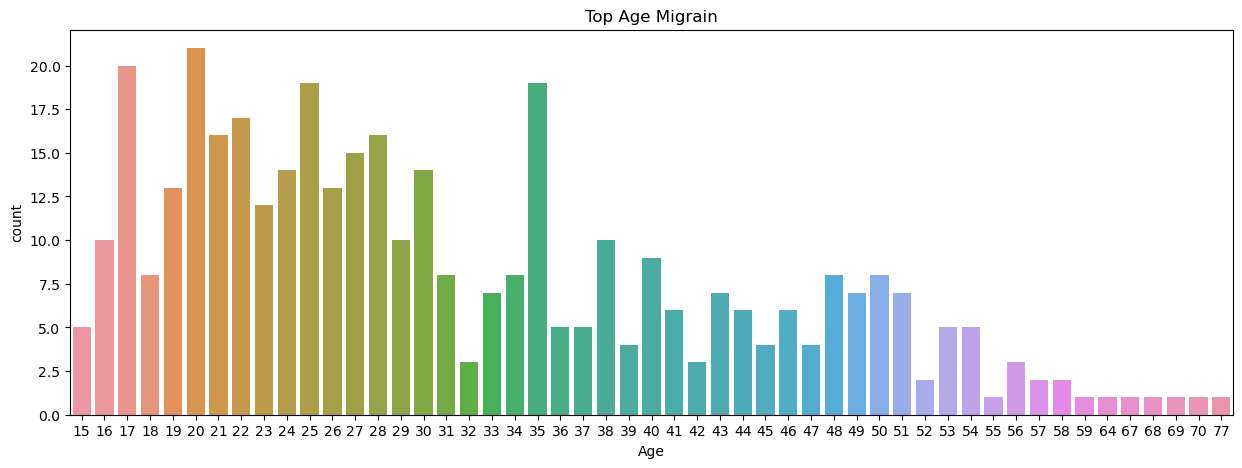

In [385]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=df,x='Age',ax=ax).set_title('Top Age Migrain')

<AxesSubplot:xlabel='Duration', ylabel='count'>

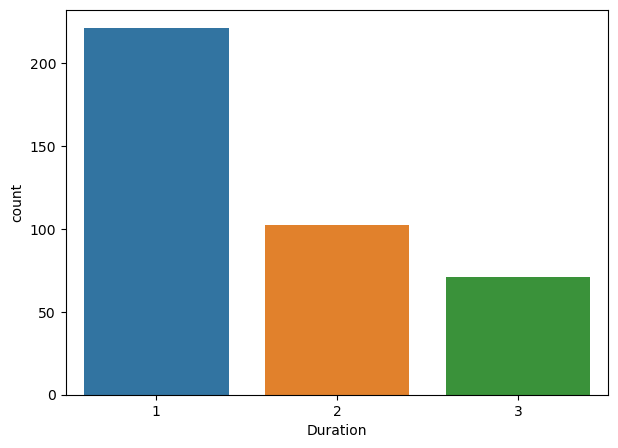

In [386]:
fig,ax=plt.subplots(figsize=(7,5))
sns.countplot(data=df,x='Duration')

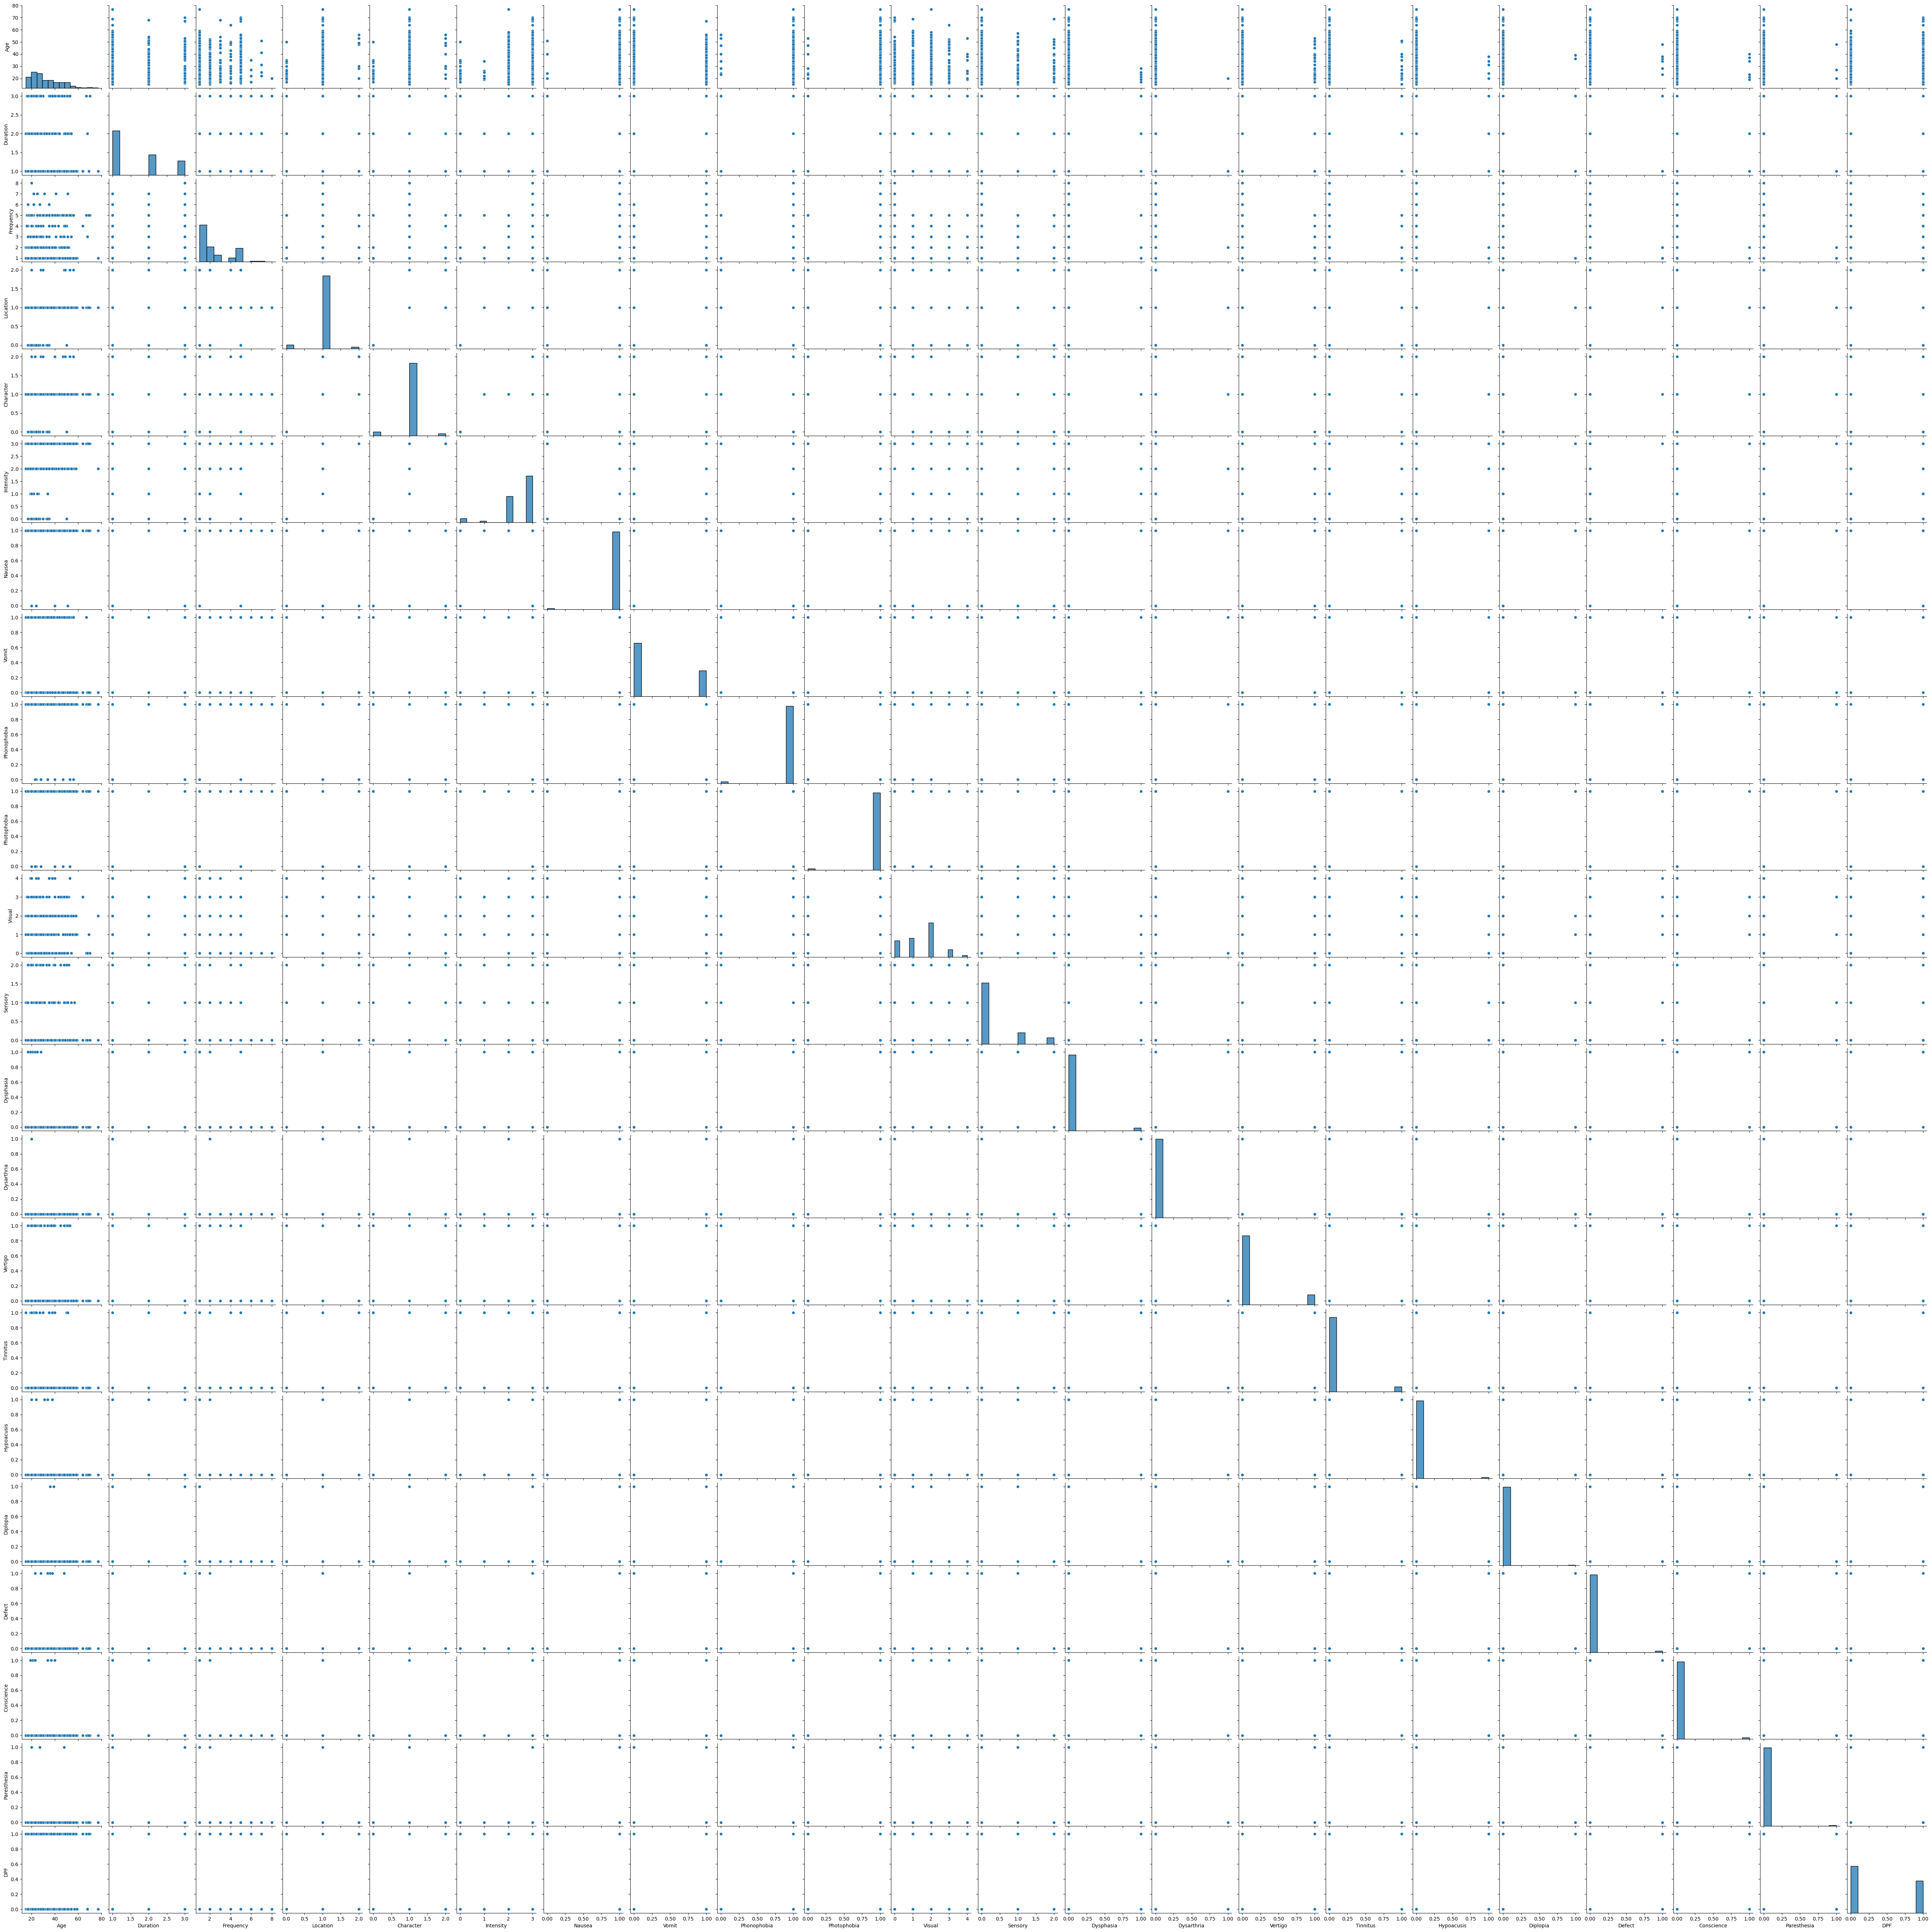

In [387]:
sns.pairplot(data=df)

# Model Classifications

In [388]:
x=df.iloc[:,:-1].values
x

array([[30,  1,  5, ...,  0,  0,  0],
       [50,  3,  5, ...,  0,  0,  0],
       [53,  2,  1, ...,  0,  0,  0],
       ...,
       [28,  3,  2, ...,  0,  0,  1],
       [20,  3,  1, ...,  0,  1,  1],
       [37,  1,  1, ...,  1,  0,  1]], dtype=int64)

In [389]:
y=df.iloc[:,-1].values
y

array(['Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Migraine without aura',
       'Basilar-type aura', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migraine without aura', 'Migraine without aura',
       'Migr

In [390]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
x_train

array([[17,  1,  1, ...,  0,  0,  1],
       [27,  1,  5, ...,  0,  0,  1],
       [32,  1,  1, ...,  0,  0,  1],
       ...,
       [22,  1,  1, ...,  0,  0,  0],
       [27,  1,  3, ...,  0,  0,  0],
       [17,  2,  5, ...,  0,  0,  1]], dtype=int64)

In [391]:
x_test

array([[33,  1,  1, ...,  0,  0,  1],
       [31,  1,  1, ...,  0,  0,  0],
       [20,  3,  5, ...,  0,  0,  1],
       ...,
       [34,  1,  1, ...,  0,  0,  0],
       [25,  1,  5, ...,  0,  0,  1],
       [17,  1,  5, ...,  0,  0,  0]], dtype=int64)

In [392]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[-1.25045542, -0.80996607, -0.82734376, ..., -0.12700013,
        -0.07993608,  1.17743944],
       [-0.41998218, -0.80996607,  1.49437815, ..., -0.12700013,
        -0.07993608,  1.17743944],
       [-0.00474556, -0.80996607, -0.82734376, ..., -0.12700013,
        -0.07993608,  1.17743944],
       ...,
       [-0.8352188 , -0.80996607, -0.82734376, ..., -0.12700013,
        -0.07993608, -0.84930058],
       [-0.41998218, -0.80996607,  0.3335172 , ..., -0.12700013,
        -0.07993608, -0.84930058],
       [-1.25045542,  0.48515734,  1.49437815, ..., -0.12700013,
        -0.07993608,  1.17743944]])

In [393]:
x_test

array([[ 0.07830176, -0.80996607, -0.82734376, ..., -0.12700013,
        -0.07993608,  1.17743944],
       [-0.08779289, -0.80996607, -0.82734376, ..., -0.12700013,
        -0.07993608, -0.84930058],
       [-1.00131345,  1.78028075,  1.49437815, ..., -0.12700013,
        -0.07993608,  1.17743944],
       ...,
       [ 0.16134909, -0.80996607, -0.82734376, ..., -0.12700013,
        -0.07993608, -0.84930058],
       [-0.58607683, -0.80996607,  1.49437815, ..., -0.12700013,
        -0.07993608,  1.17743944],
       [-1.25045542, -0.80996607,  1.49437815, ..., -0.12700013,
        -0.07993608, -0.84930058]])

In [394]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
y_pred

array(['Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Other', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Familial hemiplegic migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Familial hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Familial hemiplegic migraine', 'Typical aura with migraine',
    

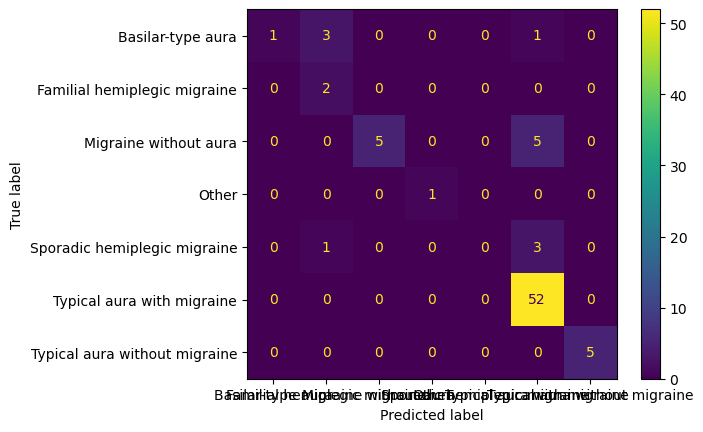

In [395]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
cmd

In [396]:
score1=accuracy_score(y_test,y_pred)
score1

0.8354430379746836

In [397]:
rprt1=classification_report(y_test,y_pred)
print(rprt1)

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.20      0.33         5
 Familial hemiplegic migraine       0.33      1.00      0.50         2
        Migraine without aura       1.00      0.50      0.67        10
                        Other       1.00      1.00      1.00         1
 Sporadic hemiplegic migraine       0.00      0.00      0.00         4
   Typical aura with migraine       0.85      1.00      0.92        52
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.84        79
                    macro avg       0.74      0.67      0.63        79
                 weighted avg       0.84      0.84      0.80        79



In [398]:
# Classifications2
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred1=model.predict(x_test)
y_pred1

array(['Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Basilar-type aura',
       'Typical aura without migraine', 'Typical aura with migraine',
       'Sporadic hemiplegic migraine', 'Typical aura with migraine',
       'Other', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Sporadic hemiplegic migraine', 'Sporadic hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Familial hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Basilar-type aura', 'Typical aura with migraine',
       'Typical aura with

In [399]:
score2=accuracy_score(y_test,y_pred1)
score2

0.9873417721518988

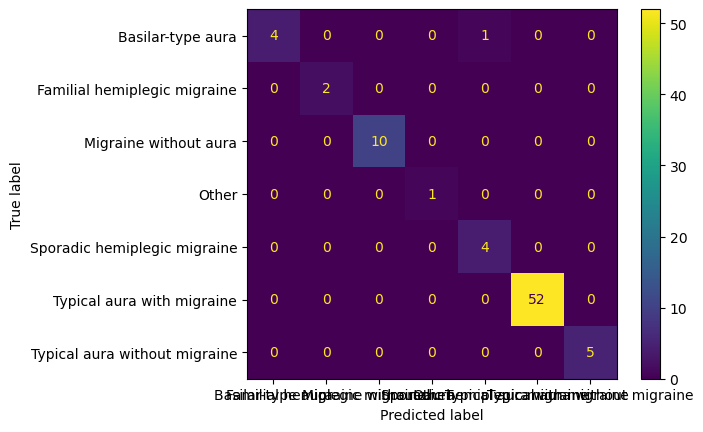

In [400]:
cmd2=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
cmd2

In [401]:
rprt2=classification_report(y_test,y_pred1)
print(rprt2)

                               precision    recall  f1-score   support

            Basilar-type aura       1.00      0.80      0.89         5
 Familial hemiplegic migraine       1.00      1.00      1.00         2
        Migraine without aura       1.00      1.00      1.00        10
                        Other       1.00      1.00      1.00         1
 Sporadic hemiplegic migraine       0.80      1.00      0.89         4
   Typical aura with migraine       1.00      1.00      1.00        52
Typical aura without migraine       1.00      1.00      1.00         5

                     accuracy                           0.99        79
                    macro avg       0.97      0.97      0.97        79
                 weighted avg       0.99      0.99      0.99        79



In [402]:
#classification3
from sklearn.svm import SVC
classifier3=SVC()
classifier3.fit(x_train,y_train)
y_pred2=classifier3.predict(x_test)
y_pred2

array(['Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura without migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Basilar-type aura',
       'Typical aura without migraine', 'Typical aura with migraine',
       'Sporadic hemiplegic migraine', 'Typical aura with migraine',
       'Other', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Familial hemiplegic migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Migraine without aura', 'Familial hemiplegic migraine',
       'Typical aura with migraine', 'Typical aura with migraine',
       'Basilar-type aura', 'Typical aura with migraine',
       'Typical aura withou

In [403]:
score3=accuracy_score(y_test,y_pred2)
score3

0.9240506329113924

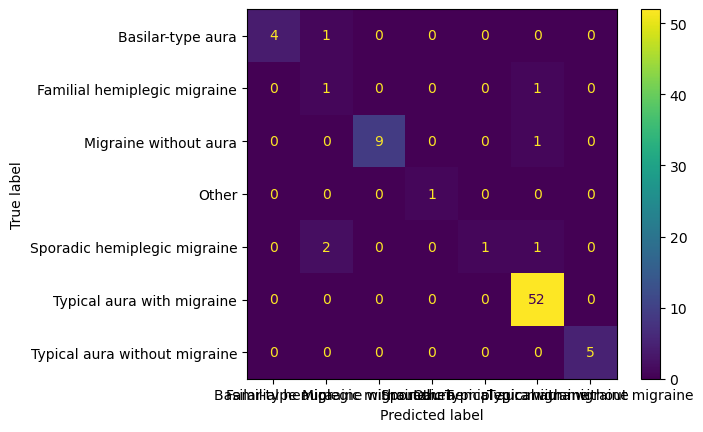

In [404]:
cmd3=ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)
cmd3